# Predicting Heart Disease with K-NN and Logistic Regression

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

# Data

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270.0,NaN,NaN,NaN,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,NaN,NaN,NaN,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,NaN,NaN,NaN,3.174074,0.95009,1.0,3.0,3.0,4.0,4.0
BP,270.0,NaN,NaN,NaN,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,NaN,NaN,NaN,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,NaN,NaN,NaN,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,NaN,NaN,NaN,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,NaN,NaN,NaN,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,NaN,NaN,NaN,0.32963,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,NaN,NaN,NaN,1.05,1.14521,0.0,0.0,0.8,1.6,6.2


In [5]:
df.shape

(270, 14)

In [6]:
# Checking for missing values.
df.isnull().values.any()

False

In [7]:
# Checking for imbalanced data based on sex.
for i in df.columns:
    print(df[i].value_counts())

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: Age, dtype: int64
1    183
0     87
Name: Sex, dtype: int64
4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64
120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9
118     7
132     6
135     6
108     6
124     5
145     5
134     4
100     4
152     4
180     3
136     3
115     3
105     3
126     3
122     3
142     3
94      2
102     2
178     2
170     2
104     1
200     1
155     1
101     1
129     1
123     1
192     1
117     1
158     1
146     1
156     1
165     1
174     1
144     1
106     1
148     1
172     1
Name: BP, dtype: int64


In [8]:
# Checking for imbalanced data based on outcome.
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

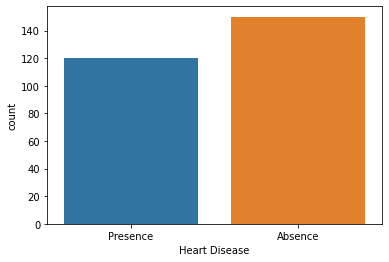

In [9]:
sns.countplot(x='Heart Disease', data=df)

In [10]:
cat_cols = ['Sex', 'FBS over 120', 'Max HR', 'EKG results', 'Exercise angina', 'Slope of ST']
for col in cat_cols:
    df[col] = df[col].astype('O')

In [11]:
num_cols = list(set(df.columns) - set(cat_cols))
num_cols.remove('Heart Disease')
num_cols

['Age',
 'ST depression',
 'Cholesterol',
 'BP',
 'Chest pain type',
 'Number of vessels fluro',
 'Thallium']

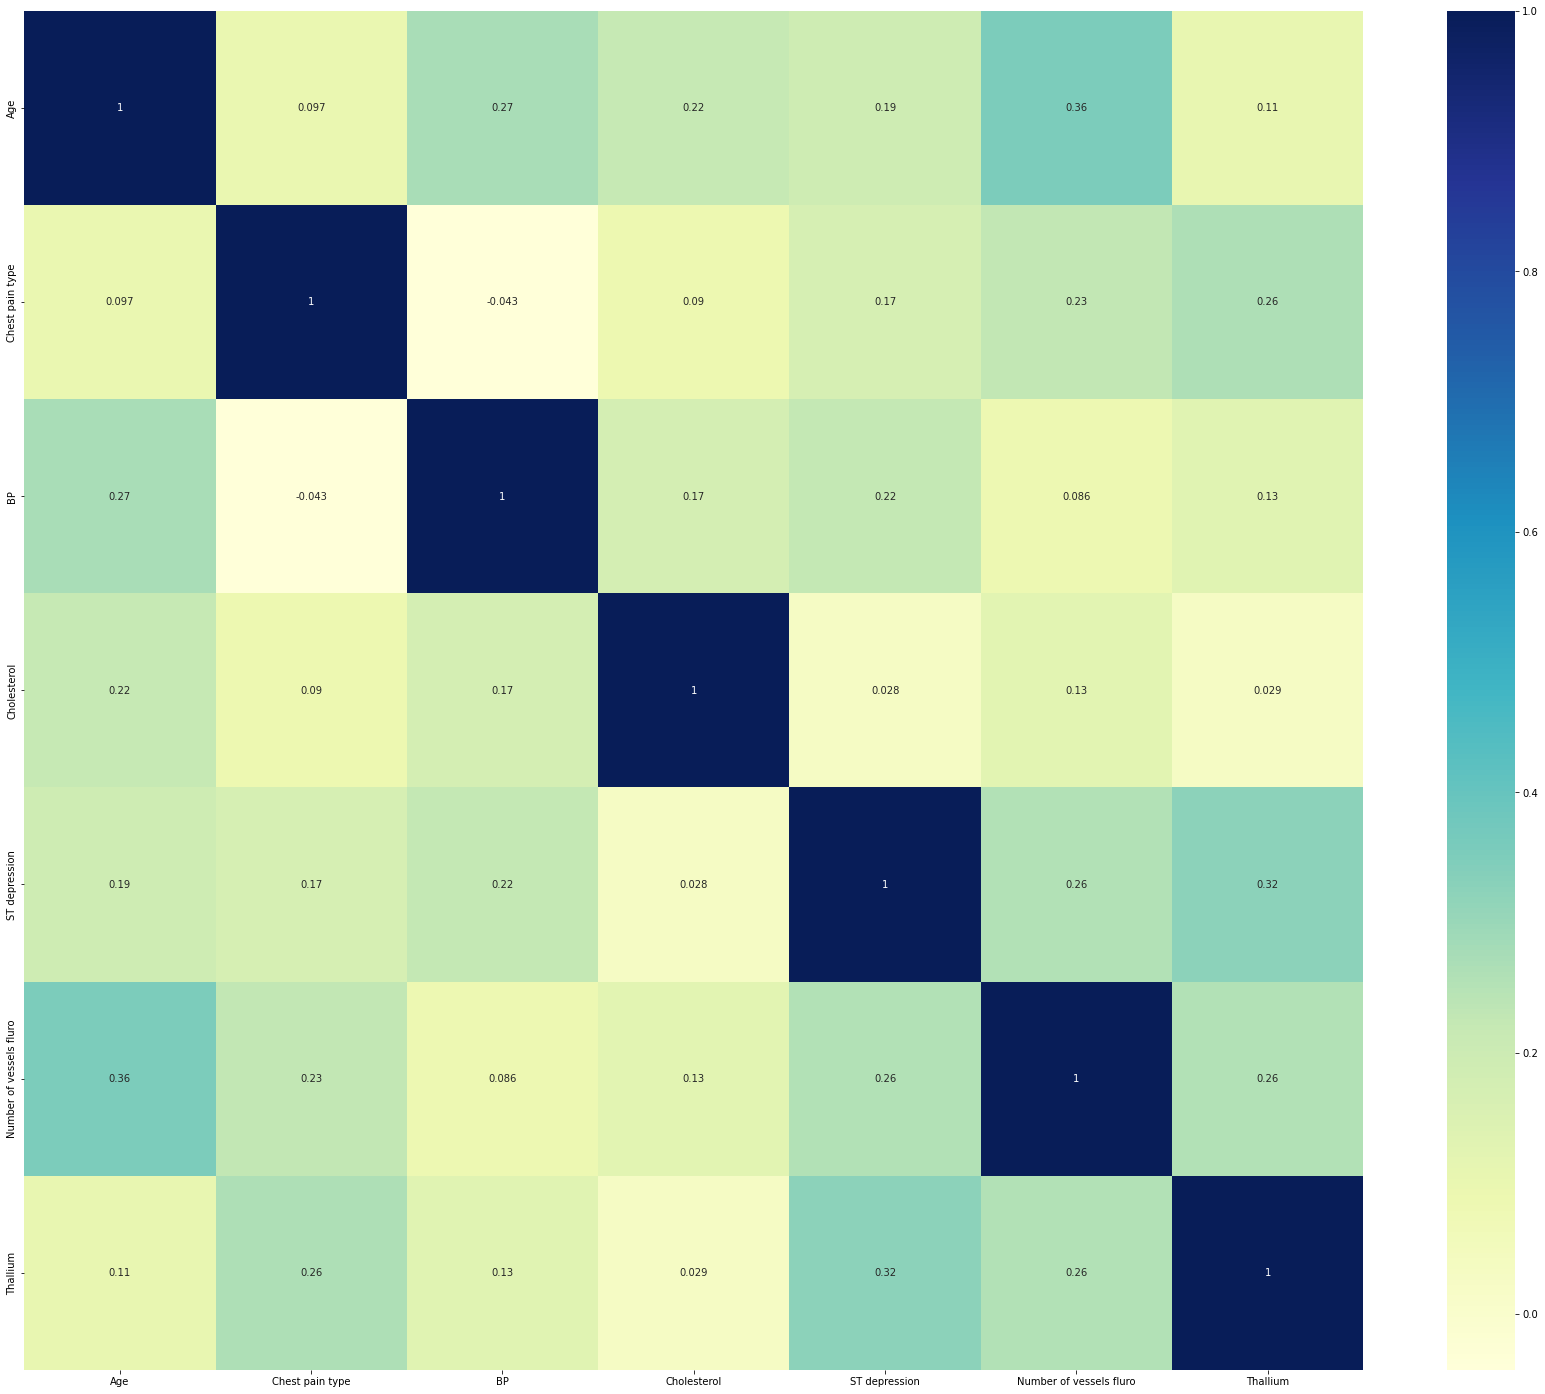

In [12]:
# Checking for any correlations.
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# K-Nearest Neighbours 

In [13]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df2 = df.copy()

# defining the map funciton
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first = True, prefix = x, prefix_sep = '-')
    df = pd.concat([df, temp])

In [ ]:
# Splitting the dataset into training and testing sets.
X = df.iloc[:, :-2]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [ ]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
# Encode y label/ dependent column
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

for i in range(0,2):
    print("Class Label: {0}, --> Heart Disease: {1}".format(i,le.inverse_transform([i])))

In [ ]:
# Creating KNN Model.
knn_clf = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
knn_clf.fit(X_train,y_train)

In [ ]:
y_pred = knn_clf.predict(X_test)
y_pred

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
# Define function to perform model result analysis
def getModelPerf(X_train,y_train,X_test,y_test,clf,):
    class_label = ['Absence', 'Presence']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # Performance Metrics
    accuracy  = round(100*accuracy_score(y_test,y_pred),2)
    precision = round(100*precision_score(y_test,y_pred),2)
    recall    = round(100*recall_score(y_test,y_pred),2) 
    f1        = round(f1_score(y_test,y_pred),2)
    
    cm = confusion_matrix(y_test,y_pred)
    print(" Confusion Matrix: ")
    print("----------------------")
    plot_confusion_matrix(clf,X_test,y_test,display_labels=class_label,cmap='viridis')
    plt.show()
    print("\n Accuracy metrics: ")
    print("----------------------")
    print("Accuracy:  {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Recall:    {0}".format(recall))
    print("F1:        {0}".format(f1))
    print("\n ROC Curve: ")
    print("----------------------")
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
#     return accuracy, precision, recall, f1,clf

In [ ]:
getModelPerf(X_train, y_train, X_test,y_test,knn_clf)

In [ ]:
#TODO: Try different values of 'k' and check the accuracy. Select optimal 'k' value based on this.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression(random_state=42)

In [ ]:
getModelPerf(X_train, y_train, X_test,y_test,log_clf)